# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
#Define the URL
url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

target_url=url+"appid="+api_key+"&units="+units+"&q="


weather_json=requests.get(target_url+cities[0]).json()

#Pretty print the JSON
print(json.dumps(weather_json,indent=4,sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -34.46,
        "lon": -58.91
    },
    "dt": 1575768393,
    "id": 3427208,
    "main": {
        "humidity": 56,
        "pressure": 1013,
        "temp": 70.43,
        "temp_max": 73.4,
        "temp_min": 66
    },
    "name": "Pilar",
    "sys": {
        "country": "AR",
        "id": 8232,
        "sunrise": 1575707774,
        "sunset": 1575759486,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 50,
        "speed": 10.29
    }
}


In [4]:
#Retrieving elements
city_name=[]
country=[]
date=[]
latitude=[]
longitude=[]
temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]

#Define counter for printing the record number and set number
record_counter=0
set_counter=1

print("Beginning Data Retrieval\n")
print("---------------------------------------------------------------\n")

for c in cities:
    try:
        
        city_response=requests.get(target_url+c).json()
        city_name.append(city_response["name"])
        country.append(city_response["sys"]["country"])
        date.append(city_response["dt"])
        latitude.append(city_response["coord"]["lat"])
        longitude.append(city_response["coord"]["lon"])
        temperature.append(city_response["main"]["temp_max"])
        humidity.append(city_response["main"]["humidity"])
        cloudiness.append(city_response["clouds"]["all"])
        wind_speed.append(city_response["wind"]["speed"])
        print(f"Processing Record {record_counter} of Set {set_counter} | {c}")
        record_counter=record_counter+1
        print(f"{target_url+c}")
        if(record_counter==50):
            record_counter=0
            set_counter=set_counter+1
    except:
        print(f"City '{c}' not found. Skipping...")

print("---------------------------------------------------------------\n")        
print("Data Retrieval Complete\n")
print("---------------------------------------------------------------")

Beginning Data Retrieval

---------------------------------------------------------------

Processing Record 0 of Set 1 | pilar
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=pilar
City 'grand river south east' not found. Skipping...
Processing Record 1 of Set 1 | portobelo
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=portobelo
Processing Record 2 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=rikitea
Processing Record 3 of Set 1 | axim
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=axim
Processing Record 4 of Set 1 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=provideniya
Processing Record 5 of Set 1 | rocha
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65

City 'illoqqortoormiut' not found. Skipping...
Processing Record 3 of Set 2 | yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=yar-sale
Processing Record 4 of Set 2 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=bandarbeyla
Processing Record 5 of Set 2 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=rio gallegos
City 'tumannyy' not found. Skipping...
Processing Record 6 of Set 2 | marawi
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=marawi
Processing Record 7 of Set 2 | sovetskiy
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=sovetskiy
Processing Record 8 of Set 2 | sao joao do paraiso
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units

Processing Record 4 of Set 3 | alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=alta floresta
Processing Record 5 of Set 3 | lata
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=lata
Processing Record 6 of Set 3 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=qaanaaq
Processing Record 7 of Set 3 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=hobart
Processing Record 8 of Set 3 | colares
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=colares
Processing Record 9 of Set 3 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=nanortalik
Processing Record 10 of Set 3 | lerwick
http://api.openweathermap.org/data/2.5/weather?app

Processing Record 7 of Set 4 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=lorengau
Processing Record 8 of Set 4 | el colomo
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=el colomo
Processing Record 9 of Set 4 | nome
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=nome
Processing Record 10 of Set 4 | payo
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=payo
City 'jaipur hat' not found. Skipping...
Processing Record 11 of Set 4 | ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=ixtapa
Processing Record 12 of Set 4 | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=qasigiannguit
City 'kamenskoye' not found. Skipping...
Processing 

Processing Record 10 of Set 5 | san pedro
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=san pedro
Processing Record 11 of Set 5 | airai
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=airai
Processing Record 12 of Set 5 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=chuy
Processing Record 13 of Set 5 | zelenoborskiy
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=zelenoborskiy
Processing Record 14 of Set 5 | beyneu
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=beyneu
Processing Record 15 of Set 5 | bubaque
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=bubaque
Processing Record 16 of Set 5 | port alfred
http://api.openweathermap.org/data/2.5/weather

Processing Record 14 of Set 6 | grindavik
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=grindavik
Processing Record 15 of Set 6 | talnakh
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=talnakh
Processing Record 16 of Set 6 | bojonegoro
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=bojonegoro
City 'grand centre' not found. Skipping...
Processing Record 17 of Set 6 | shiraz
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=shiraz
Processing Record 18 of Set 6 | bakchar
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=bakchar
Processing Record 19 of Set 6 | krasnyy kholm
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=krasnyy kholm
Processing Record 20 of Set 6 |

Processing Record 18 of Set 7 | liwale
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=liwale
Processing Record 19 of Set 7 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=clyde river
Processing Record 20 of Set 7 | nemuro
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=nemuro
Processing Record 21 of Set 7 | makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=makakilo city
Processing Record 22 of Set 7 | whitehorse
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=whitehorse
Processing Record 23 of Set 7 | blind river
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=blind river
Processing Record 24 of Set 7 | beni suef
http://api.openweather

Processing Record 21 of Set 8 | kisesa
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=kisesa
Processing Record 22 of Set 8 | veinticinco de mayo
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=veinticinco de mayo
Processing Record 23 of Set 8 | kungurtug
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=kungurtug
Processing Record 24 of Set 8 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=salalah
Processing Record 25 of Set 8 | wamba
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=wamba
Processing Record 26 of Set 8 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=cabo san lucas
Processing Record 27 of Set 8 | north bend
http://api.open

Processing Record 25 of Set 9 | smoky lake
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=smoky lake
Processing Record 26 of Set 9 | victoria point
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=victoria point
Processing Record 27 of Set 9 | aranos
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=aranos
Processing Record 28 of Set 9 | wajir
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=wajir
Processing Record 29 of Set 9 | shelburne
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=shelburne
Processing Record 30 of Set 9 | manta
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=manta
Processing Record 31 of Set 9 | kuytun
http://api.openweathermap.org/data/2.5/we

Processing Record 29 of Set 10 | fare
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=fare
Processing Record 30 of Set 10 | sidney
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=sidney
Processing Record 31 of Set 10 | chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=chernyshevskiy
Processing Record 32 of Set 10 | poum
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=poum
Processing Record 33 of Set 10 | cuajinicuilapa
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=cuajinicuilapa
Processing Record 34 of Set 10 | wynyard
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=wynyard
Processing Record 35 of Set 10 | pundaguitan
http://api.openweathermap.org

Processing Record 32 of Set 11 | alugan
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=alugan
City 'tambura' not found. Skipping...
Processing Record 33 of Set 11 | wakkanai
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=wakkanai
Processing Record 34 of Set 11 | kulykivka
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=kulykivka
City 'asfi' not found. Skipping...
Processing Record 35 of Set 11 | hovd
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=hovd
Processing Record 36 of Set 11 | wufeng
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=wufeng
Processing Record 37 of Set 11 | busko-zdroj
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=busko-zdroj
City 'fevra

Processing Record 34 of Set 12 | requena
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=requena
Processing Record 35 of Set 12 | velingara
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=velingara
Processing Record 36 of Set 12 | farafangana
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=farafangana
---------------------------------------------------------------

Data Retrieval Complete

---------------------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Convert the data to DataFrame
city_weather_df=pd.DataFrame({"City":city_name,
                              "Country":country,
                              "Date":date,
                             "Latitude":latitude,
                             "Longitude":longitude,
                             "Temperature":temperature,
                             "Humidity":humidity,
                             "Cloudiness":cloudiness,
                             "Wind_speed":wind_speed})

#Convert date from unix format
city_weather_df["Date"]=pd.to_datetime(city_weather_df["Date"],unit='s')

#Display the DataFrame
city_weather_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_speed
0,Pilar,AR,2019-12-08 01:26:33,-34.46,-58.91,73.40,56,100,10.29
1,Portobelo,PA,2019-12-08 01:26:35,9.55,-79.65,77.00,94,40,3.80
2,Rikitea,PF,2019-12-08 01:23:04,-23.12,-134.97,74.44,72,100,21.39
3,Axim,GH,2019-12-08 01:26:35,4.87,-2.24,75.87,90,67,1.54
4,Provideniya,RU,2019-12-08 01:23:37,64.42,-173.23,11.61,92,98,24.81


In [10]:
#Verify counts
city_weather_df.count()

City           587
Country        587
Date           587
Latitude       587
Longitude      587
Temperature    587
Humidity       587
Cloudiness     587
Wind_speed     587
dtype: int64

In [11]:
#Retrieve the current date for plotting the graphs
current_date_list=(city_weather_df["Date"].dt.strftime('%m/%d/%y')).unique()
current_date=current_date_list[0]
current_date

'12/08/19'

In [12]:
#Export the city data into a .csv.
city_weather_df.to_csv("../city_weather.csv",index=False,header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

//anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


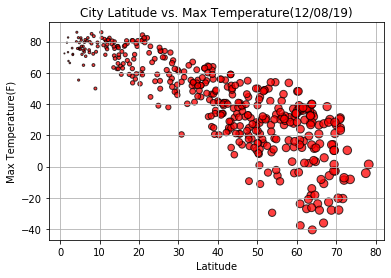

In [13]:
# Plot Latitude vs.Temperature (Scatter Plot)
plt.scatter(city_weather_df["Latitude"],city_weather_df["Temperature"],marker="o",facecolors="red",edgecolors="black",s=latitude,alpha=0.75)

# Set the labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")


#Set the title
plt.title(f"City Latitude vs. Max Temperature({current_date})")

#Set the grids
plt.grid()

#Save the plot
plt.savefig("../Latitude_vs_Temperature.png")

#Show the plot
plt.show()

#### Latitude vs. Humidity Plot

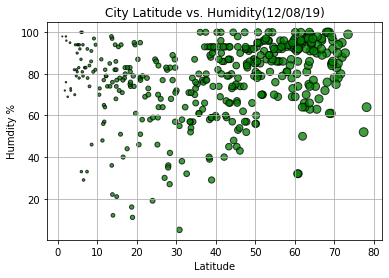

In [14]:
# Plot Latitude vs. Humidity

plt.scatter(city_weather_df["Latitude"],city_weather_df["Humidity"],marker="o",facecolors="green",edgecolors="black",s=latitude,alpha=0.75)

# Set the labels
plt.xlabel("Latitude")
plt.ylabel("Humdity %")

#Set the title
plt.title(f"City Latitude vs. Humidity({current_date})")

#Set the grids
plt.grid()

#Save the plot
plt.savefig("../Latitude_vs_Humidity.png")

#Show the plot
plt.show()

#### Latitude vs. Cloudiness Plot

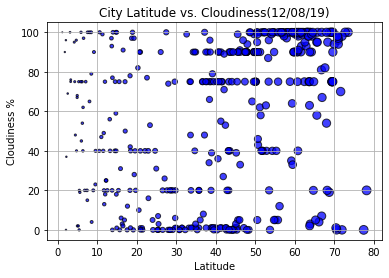

In [15]:
# Plot Latitude vs. Cloudiness
plt.scatter(city_weather_df["Latitude"],city_weather_df["Cloudiness"],marker="o",facecolors="blue",edgecolors="black",s=latitude,alpha=0.75)

# Set the labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

#Set the title
plt.title(f"City Latitude vs. Cloudiness({current_date})")

#Set the grids
plt.grid()

#Save the plot
plt.savefig("../Latitude_vs_Cloudiness.png")

#Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

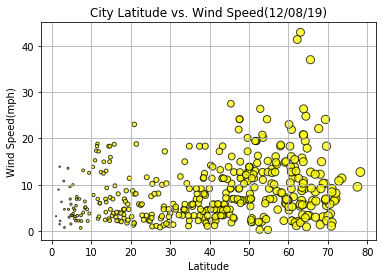

In [16]:
# Plot Latitude vs. Wind Speed
plt.scatter(city_weather_df["Latitude"],city_weather_df["Wind_speed"],marker="o",facecolors="yellow",edgecolors="black",s=latitude,alpha=0.75)

# Set the labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

#Set the title
plt.title(f"City Latitude vs. Wind Speed({current_date})")

#Set the grids
plt.grid()

#Save the plot
plt.savefig("../Latitude_vs_Wind_Speed.png")

#Show the plot
plt.show()

# Observations

1. Latitude vs. Temperature: 
    (a) The distance from Equator affects the temperature.
    (b) If the city is farther away, the temperature is colder.
    (c) If the city is closer to the equator, the temperature is warmer.

2. Latitude vs. Humidity: 
    (a) Needs additional analysis, may be addition of Temperature as a parameter can help us derive better observations.
    
3. Latitude vs. Cloudiness:
    (a) Needs additional analysis, no observation can be made with the available information.
    
4. Latitude vs. Wind Speed: 
    (a)Windspeeds seem to be high at latitudes furthest from the equator.